<a href="https://colab.research.google.com/github/ananthakrishnanpta/Logistic_regression_project/blob/main/Logistic_Regression_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Introduction**

In this project you will be provided with real world data which is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. 

The classification goal is to predict if the client will subscribe a term deposit (variable y).

![img](https://www.esa.int/var/esa/storage/images/esa_multimedia/images/2014/06/portuguese_bank/14568311-1-eng-GB/Portuguese_bank_pillars.jpg)

We are a data science team in thier offices and it our task to make the most sense of the data provided by the company

![img](https://www.expatica.com/app/uploads/sites/8/2017/05/banking-in-portugal-1920x1080.jpg)

# Let us Get Started!

As you remember our task is to explore our Bank's Marketing campaign and create meaningful insights from the data

The step one should be accessing the data 

Our data has been curated by [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php) which is an excellent datahouse of various real world problems! 

We are going to use the Banking Data described by our friends in UCI [here](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)

The data can also be downloaded from the Tech I.S. [Github](https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv) Repository 



# Good Start!

Now that you have your dataset , let us go through the problems one by one!

In [235]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Section I : Data Loading

Part I : Load the dataset into the notebook <br>
Part II : Explore and make note of Attribute Information from UCI <br>
Part III : What is the significance of the `y` column in the dataset and what are the value counts of the `y` column? <br>
Part IV : What is the ratio of the two classes ? Are they balanced ? <br>

In [236]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [237]:
# I. Loading dataset

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/techis-ds-wiki/DS/Step 2-2 Classification Algos/01_Logistic-Regression/banking.csv')

In [238]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,222,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,196,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,62,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,200,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


In [239]:
# II. Describing the dataframe to analyze the attributes and values of the dataset
df.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [240]:
# III. y column in the dataset helps us with the information on whether the client will start a term deposit

df['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [241]:
# IV. The ratio of the classes is 36548:4640, hence they are not balanced

# Section II : Data Cleaning 

Since this is real world data , A good practice is to make sure the dataset is devoid of any nuances 

Part I : Get the `dtypes` of all the columns of our dataset <br>
Part II : Refering to the UCI data description , explore the data in your columns and check if there are any errors <br>
Part III : Make note of the deviation in the dataset compared to the description provided by [UCI](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing) <br>
Part IV : Using Data Cleaning principles you learned from [Pandas Tutorial](https://github.com/Tech-i-s/data-science-course-wiki/tree/master/common/step%201-4%20(Pandas)) figure out the best ways to get rid of the dirty data 
Part V : Print the cleaned data



In [242]:
# I. 
display(df.dtypes)

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object

In [243]:
# II. 

df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

# Section III : Exploring data with Group by

In this section , we must create some primitive EDA

Use the `groupby` function on the mean of the following columns :

I : y <br>
II : job <br>
III : marital<br>
IV : education<br>

Make a note of what you learn from the outputs !




In [244]:
# I. 

df.groupby(['y']).mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [245]:
# II.

df.groupby(['job']).mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350,0.129726
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286


In [246]:
df.groupby(['marital']).mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,,
divorced,44.899393,253.790330,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643,0.103209
married,42.307165,257.438623,2.57281,967.247673,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772,0.101573
single,33.158714,261.524378,2.53380,949.909578,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265,0.140041
unknown,40.275000,312.725000,3.18750,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313038,5157.393750,0.150000


In [247]:
df.groupby(['education']).mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,,
basic.4y,47.596504,264.827826,2.600575,965.704981,0.147031,0.215924,93.658309,-40.239871,3.751768,5170.124880,0.102490
basic.6y,40.448953,264.414485,2.556283,980.368237,0.129145,0.231152,93.650062,-41.127880,3.772942,5174.718063,0.082024
basic.9y,39.061208,261.291811,2.532341,979.133168,0.141439,0.159239,93.623399,-41.326749,3.697963,5172.294012,0.078246
high.school,37.998213,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735,0.108355
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222
professional.course,40.080107,252.533855,2.586115,960.765974,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979,0.113485
university.degree,38.879191,253.223373,2.563527,951.807692,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298,0.137245
unknown,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509,0.145003


# Section III : Exploratory Data Analysis

Let us put Matplotlib to use !

Part I : Create bar graphs to the frequency of purchase with respect to the job , martial etc <br>
Part II : Also create stacked bars to same data columns with respect to <br>
Part III : Explore the age column using a histogram and note down your observations

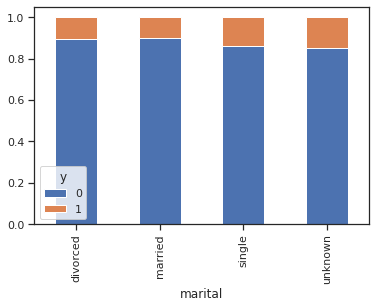

In [248]:
# I.
MB = pd.crosstab(df['marital'],df['y'])
MB.div(MB.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)


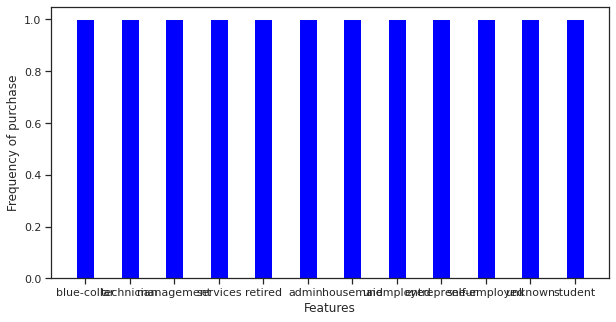

In [249]:
fig = plt.figure(figsize = (10, 5))
x = df['job']
y = df['y']
plt.bar(x,y, color ='blue',width = 0.4)
plt.xlabel("Features")
plt.ylabel("Frequency of purchase")
plt.show()

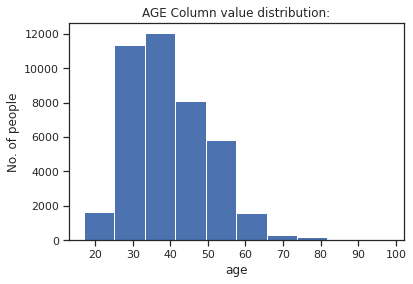

In [250]:
x = df['age']
plt.hist(x)
plt.title('AGE Column value distribution:')
plt.xlabel("age")
plt.ylabel("No. of people")
plt.show()

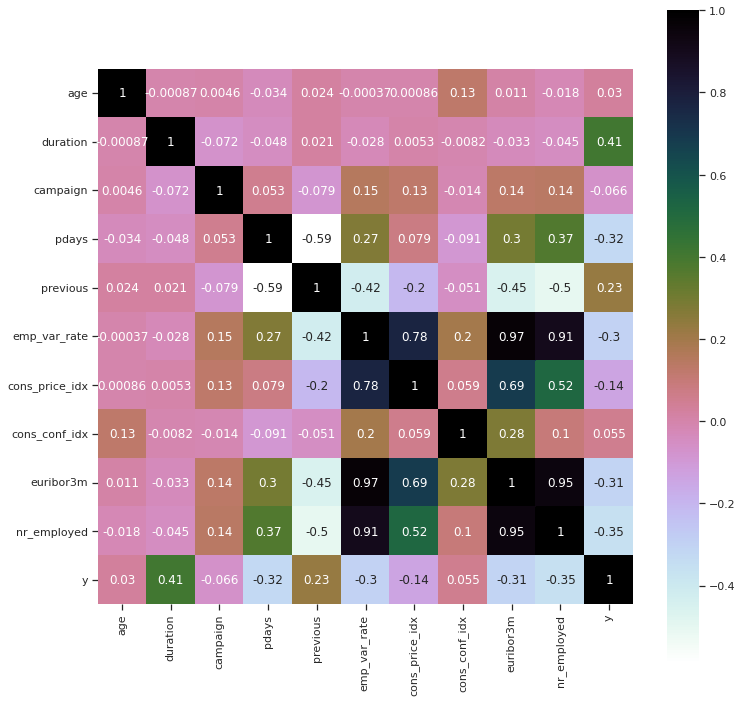

In [251]:
data_corr = df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(data_corr, annot=True, cmap='cubehelix_r',square=True)
plt.show()

In [252]:

sns.set(style = 'ticks', color_codes=True)
sns.pairplot(data=df, hue='y',  
             vars=['age','duration','campaign','pdays','previous','emp_var_rate','cons_price_idx','cons_conf_idx','euribor3m','nr_employed'])
             

"\nsns.set(style = 'ticks', color_codes=True)\nsns.pairplot(data=df, hue='y',  \n             vars=['age','duration','campaign','pdays','previous','emp_var_rate','cons_price_idx','cons_conf_idx','euribor3m','nr_employed'])\n             "

# Section IV : Categorical Variable Encoding 

Part I : Create dummy variables for your categorial variables <br>
part II : Explore your new dataset with these new dummy variables !

In [253]:
# I. Exploring data series with categoical values

cat_val = df.columns[df.dtypes == 'object']

for i in cat_val:
  print("The column named : '",i,"' has the following unique values: \n")
  display(list(df[i].unique()))
  print()


The column named : ' job ' has the following unique values: 



['blue-collar',
 'technician',
 'management',
 'services',
 'retired',
 'admin.',
 'housemaid',
 'unemployed',
 'entrepreneur',
 'self-employed',
 'unknown',
 'student']


The column named : ' marital ' has the following unique values: 



['married', 'single', 'divorced', 'unknown']


The column named : ' education ' has the following unique values: 



['basic.4y',
 'unknown',
 'university.degree',
 'high.school',
 'basic.9y',
 'professional.course',
 'basic.6y',
 'illiterate']


The column named : ' default ' has the following unique values: 



['unknown', 'no', 'yes']


The column named : ' housing ' has the following unique values: 



['yes', 'no', 'unknown']


The column named : ' loan ' has the following unique values: 



['no', 'yes', 'unknown']


The column named : ' contact ' has the following unique values: 



['cellular', 'telephone']


The column named : ' month ' has the following unique values: 



['aug', 'nov', 'jun', 'apr', 'jul', 'may', 'oct', 'mar', 'sep', 'dec']


The column named : ' day_of_week ' has the following unique values: 



['thu', 'fri', 'tue', 'mon', 'wed']


The column named : ' poutcome ' has the following unique values: 



['nonexistent', 'success', 'failure']

In [254]:
df_new=pd.get_dummies(df,columns=cat_val)
# display(df_new)

In [255]:
# II.
df_new.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654,0.253035,0.224677,0.035350,0.025736,0.070992,0.041760,0.034500,0.096363,0.021244,0.163713,0.024619,0.008012,0.111974,0.605225,0.280859,0.001942,0.101389,0.055647,0.146766,0.231014,0.000437,0.127294,0.295426,0.042027,0.791201,0.208726,0.000073,0.452122,0.024036,0.523842,0.824269,0.024036,0.151695,0.634748,0.365252,0.063902,0.149995,0.004419,0.174177,0.129115,0.013256,0.334296,0.099568,0.017432,0.013839,0.190031,0.206711,0.209357,0.196416,0.197485,0.103234,0.863431,0.033335
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173,0.434756,0.417375,0.184665,0.158348,0.256814,0.200042,0.182513,0.295092,0.144199,0.370019,0.154962,0.089152,0.315339,0.488808,0.449424,0.044029,0.301846,0.229242,0.353877,0.421486,0.020901,0.333306,0.456239,0.200653,0.406455,0.406403,0.008534,0.497708,0.153163,0.499437,0.380596,0.153163,0.358729,0.481507,0.481507,0.244581,0.357071,0.066328,0.379266,0.335332,0.114372,0.471750,0.299427,0.130877,0.116824,0.392330,0.404951,0.406855,0.397292,0.398106,0.304268,0.343396,0.179512
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

In [256]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 64 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  int64  
 4   previous                       41188 non-null  int64  
 5   emp_var_rate                   41188 non-null  float64
 6   cons_price_idx                 41188 non-null  float64
 7   cons_conf_idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr_employed                    41188 non-null  float64
 10  y                              41188 non-null  int64  
 11  job_admin.                     41188 non-null  uint8  
 12  job_blue-collar                41188 non-null 

In [257]:
df_new.shape


(41188, 64)

In [258]:
df_new.isnull().sum()

age                     0
duration                0
campaign                0
pdays                   0
previous                0
                       ..
day_of_week_tue         0
day_of_week_wed         0
poutcome_failure        0
poutcome_nonexistent    0
poutcome_success        0
Length: 64, dtype: int64

# Section V : Preliminary Training 

Part I : Import your [Logisitc Regression libraries](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) <br>
Part II : Split your train and test dataset and train on the data <br>
Part III : Make note of the classification report and other metrics 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estima

[0 0 0 ... 0 0 0]

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7327
           1       0.67      0.40      0.50       911

    accuracy                           0.91      8238
   macro avg       0.80      0.69      0.73      8238
weighted avg       0.90      0.91      0.90      8238

The accuracy of the Model 0.911750424860403
Confusion matrix, without normalization
[[7148  179]
 [ 548  363]]
Normalized confusion matrix
[[0.97556981 0.02443019]
 [0.60153677 0.39846323]]


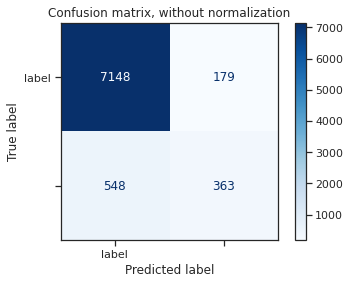

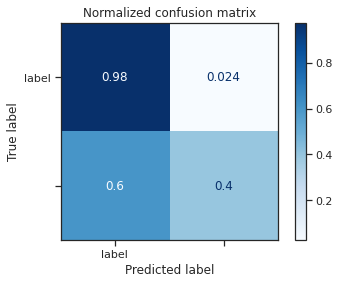

In [259]:
# II.
x = df_new.drop(['y'],axis = 1)
y = df_new['y']
# Splitting into train and test
x_train , x_test, y_train, y_test = train_test_split(x,y,test_size=0.20)

#testing standard scaler
"""
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)
#test code ends here
"""

#Train the model
model = LogisticRegression(verbose=1)
model.fit(x_train, y_train) #Training the model

#Test the model
predictions = model.predict(x_test)
print(predictions)# printing predictions

print()# Printing new line

#Check precision, recall, f1-score
print( classification_report(y_test, predictions) )

from sklearn.metrics import plot_confusion_matrix

print( "The accuracy of the Model",accuracy_score(y_test, predictions))

class_names = ['label']

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, x_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()


# Section VI : Let's Improve the performance !

Part 0 : What was your answer to **Section - Part IV**? Do you think class imbalance affects the model performance? Explore [SMOTE implementation](https://arxiv.org/pdf/1106.1813.pdf)

Part I : Make note of the performance from the last training <br>
Part II : Try implementing [SMOTE](http://imbalanced-learn.org/en/stable/over_sampling.html#smote-variants) to balance the two class labels <br>
Part III :  Make note of the `y` label data now , what are the rations now ?

In [293]:
print("shape of x_train: ", x_train.shape)
print("shape of y_train: ",y_train.shape)
from imblearn.over_sampling import SMOTE

sm = SMOTE()
x_sm,y_sm = sm.fit_resample(x,y)

shape of x_train:  (32950, 63)
shape of y_train:  (58476,)


In [292]:
X_train, X_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size=0.2, random_state=0)

In [287]:
print(X_test.shape)
y_test.shape

(14620, 63)


(14620,)

In [284]:
#sm_train_X,sm_train_y=sm.fit_resample(X_train, y_train)
#sm_train_X= pd.DataFrame(data=X_train,columns=X_train.columns)
#sm_train_y = pd.DataFrame(data=y_train,columns=['y'])

In [289]:
X_test.shape

(14620, 63)

In [290]:
sm_train_y.value_counts()

y
0    29258
1    29218
dtype: int64

In [265]:
y_train.value_counts()

0    29223
1     3727
Name: y, dtype: int64

# Section VII : Let us Re-Train!

Part I : Explore what [RFE](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html) means <br>
Part II : Implement your training process inside the RFE <br>
Part III : What are the best columns that your RFE found? Please make a list of it 

In [266]:
y_test.shape

(8238,)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estima

[0 0 1 ... 0 1 1]

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7290
           1       0.93      0.93      0.93      7330

    accuracy                           0.93     14620
   macro avg       0.93      0.93      0.93     14620
weighted avg       0.93      0.93      0.93     14620

The accuracy of the Model 0.9263337893296854
Confusion matrix, without normalization
[[6759  531]
 [ 546 6784]]
Normalized confusion matrix
[[6759  531]
 [ 546 6784]]


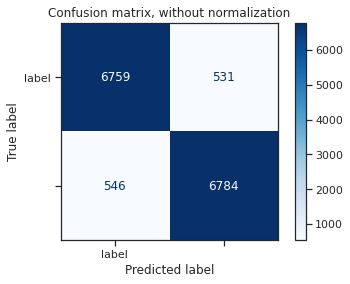

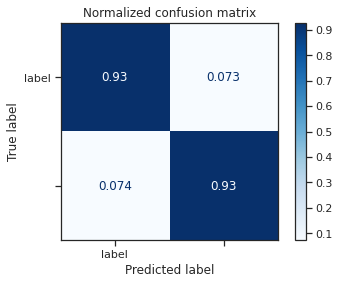

In [296]:
# Retraining the model

model = LogisticRegression(verbose=1)
model.fit(X_train, y_train) #Training the model

#Test the model
predictions = model.predict(X_test)
print(predictions)# printing predictions

print()# Printing new line

#Check precision, recall, f1-score
print( classification_report(y_test, predictions))

from sklearn.metrics import plot_confusion_matrix

print( "The accuracy of the Model",accuracy_score(y_test, predictions))

class_names = ['label']

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(confusion_matrix(y_test,predictions))

plt.show()


In [306]:
# II. Implementing RFE


from sklearn.feature_selection import RFE
rfe = RFE(model, n_features_to_select= 50)
rfe = rfe.fit(X_train, y_train)
rfe.ranking_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the da

array([12,  9,  5, 11,  3,  1,  1,  6,  8,  7,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 13,  1,  1,  1,
        1,  1, 14,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,
        1,  1, 10,  1,  1,  1,  1,  1,  1,  1,  1,  4])

RFE(estimator=LogisticRegression(verbose=1), n_features_to_select=50)

# Section VIII : Training time !

Now that you have found the best columns for this problem

Part I : Now train the model with the new data you have created after the RFE <br>
Part II : Create the prediction system to get the metrics such as accuracy

In [302]:
#Predicting Test set
#Test the model
predictions = model.predict(X_test)
print(predictions)# printing predictions

print()# Printing new line

#Check precision, recall, f1-score
print( classification_report(y_test, predictions) )

[0 0 1 ... 0 1 1]

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7290
           1       0.93      0.93      0.93      7330

    accuracy                           0.93     14620
   macro avg       0.93      0.93      0.93     14620
weighted avg       0.93      0.93      0.93     14620



# Section IX : Additional Metrics

Accuracy is not always the best metric 

Part I : Explore what [Confusion Matrix](https://www.geeksforgeeks.org/confusion-matrix-machine-learning/#:~:text=A%20confusion%20matrix%20is%20a,the%20performance%20of%20an%20algorithm.) means <br>
Part II : Create the confusion matrix for the predictions and make note of the outputs <br>
Part III : Create a classification report and make note of various outputs 

In [303]:
confusion_matrix(y_test, predictions)

array([[6759,  531],
       [ 546, 6784]])

In [304]:

print( "The accuracy of the Model",accuracy_score(y_test, predictions))



The accuracy of the Model 0.9263337893296854


# Section X : What's next?

Part I : Make a note of difference in performance? <br>
Part II : Can you recommend more improvements that could give much better results in all metrics?